In [2]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from tensorflow.keras import Input

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization,GlobalMaxPooling2D
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from keras.utils.np_utils import to_categorical
from keras import utils as np_utils
import food_mnist

import warnings
warnings.filterwarnings("ignore")

module google.colab.patches not imported.


In [3]:
(x_train, y_train), (x_test, y_test) = food_mnist.load_data()
labels_names = food_mnist.labels()

In [3]:
def label(x):
    return labels_names[x]


this image is a: baby_back_ribs


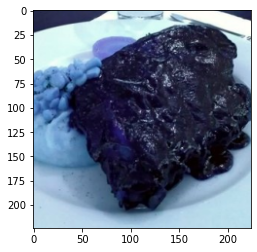

In [4]:
example = 550
g = plt.imshow(x_train[example])
print('\nthis image is a: ' + label(y_train[example]))

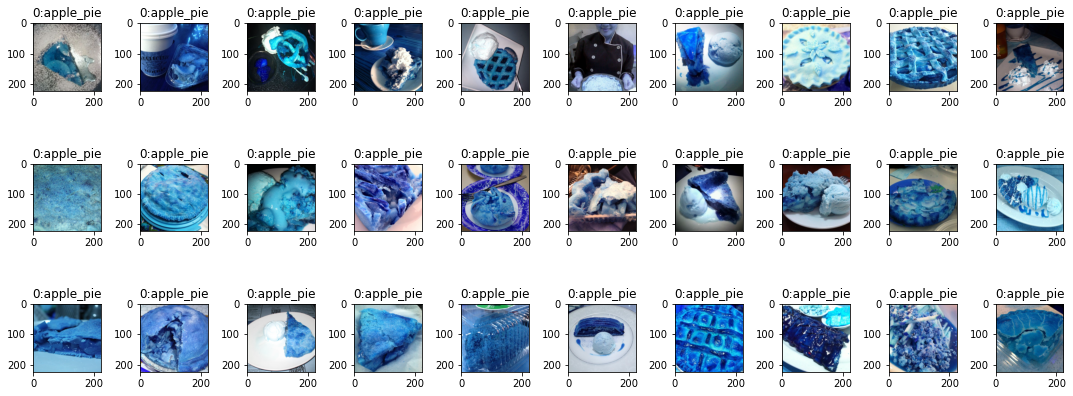

In [5]:
num_row = 3
num_col = 10
num = num_row * num_col

fig, axes = plt.subplots(num_row, num_col,
                        figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('%d:%s'%(y_train[i], labels_names[y_train[i]]))
plt.tight_layout()
plt.show()

0    375
2    375
4    375
6    375
8    375
1    375
3    375
5    375
7    375
9    375
dtype: int64

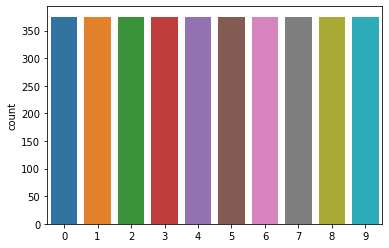

In [6]:
df = pd.Series(y_train)
g = sns.countplot(df)
df.value_counts()

In [4]:
x_train = x_train/255.
x_test = x_test/255.

y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))
print(y_train[500])

number of training examples = 3750
number of test examples = 1250
X_train shape: (3750, 224, 224, 3)
Y_train shape: (3750, 10)
X_test shape: (1250, 224, 224, 3)
Y_test shape: (1250, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
model = EfficientNetB0(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 

x=model.output

x= GlobalAveragePooling2D()(x)

predictions = Dense(units = 10, activation="softmax")(x)

In [6]:
model=Model(inputs=model.input,outputs=predictions)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [7]:
for i,layer in enumerate(model.layers):
  print("{}: {}".format(i,layer))

0: <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f8b3c0df040>
1: <tensorflow.python.keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f8b441d3a30>
2: <tensorflow.python.keras.layers.preprocessing.normalization.Normalization object at 0x7f8b441d3c70>
3: <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f8b441d3ee0>
4: <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8b4427bc70>
5: <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f89bf7af850>
6: <tensorflow.python.keras.layers.core.Activation object at 0x7f89bf7afd00>
7: <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7f89bf7af310>
8: <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f89bf7d29d0>
9: <tensorflow.python.keras.layers.core.Activation object at 0x7f89bf816d60>
10: <tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f89bf816eb0>
11: <

In [ ]:
for layer in model.layers[:237]:
    layer.trainable=False
for layer in model.layers[237:]:
    layer.trainable=True

In [ ]:
history = model.fit(x_train, y_train,
              epochs=5,
              batch_size = 224)

Epoch 1/10


In [ ]:
ypred = model.predict(x_test)

total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(ypred)):
    if np.argmax(ypred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)
        
    total += 1
    
print('Total-test-data;', total, '\nAccurately-predicted-data:', accurate, '\nWrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')